In [1]:
import pandas as pd
import numpy as np
import nltk
from nltk import pos_tag
from nltk import word_tokenize
import re

In [2]:
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
# A dataset collected from Kaggle (collection of Tweets)
# ---> Toxic - 1, Non toxic - 0

df = pd.read_csv('C:/Users/Spriha/OneDrive/Desktop/FinalBalancedDataset.csv')
df = df[['Toxicity','Tweet']]

In [4]:
df.head()

,Toxicity,Tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


In [5]:
df.shape

(56745, 2)

In [6]:
np.unique(df['Toxicity'], return_counts = True)

(array([0, 1], dtype=int64), array([32592, 24153], dtype=int64))

In [7]:
df['Tweet'][0]

' @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run'

In [9]:
# Preprocess the text data
# --- > Removing non-words and extra white spaces


for i in range(len(df['Tweet'])):
    df['Tweet'][i] = df['Tweet'][i].lower()
    df['Tweet'][i] = df['Tweet'][i].strip()
    df['Tweet'][i] = re.sub(r'\W', ' ', df['Tweet'][i])
    df['Tweet'][i] = re.sub(r'\d+', ' ', df['Tweet'][i])
    df['Tweet'][i] = re.sub(r'\s+', ' ', df['Tweet'][i])

In [23]:
l = list(range(0, df.shape[0]))

np.random.seed(1)
np.random.shuffle(l)

In [24]:
dataset = df.loc[l[:10000],:]

In [25]:
dataset.shape

(10000, 2)

In [26]:
np.unique(dataset['Toxicity'], return_counts = True)

(array([0, 1], dtype=int64), array([5821, 4179], dtype=int64))

In [27]:
#Tokenise the text data to create Bag-Of-Words

tokenized_data = []
for each in dataset['Tweet']:
    tokenized_data.append(word_tokenize(each))

In [28]:
tokenized_data[0]

['i',
 'think',
 'i',
 'may',
 'have',
 'just',
 'sent',
 'my',
 'first',
 'tweet',
 'fathers',
 'day']

In [29]:
# Removing stopwords and stemming !!

from nltk.corpus import stopwords
sw = stopwords.words('english')

from nltk.stem import SnowballStemmer
sb = SnowballStemmer('english')

stemmed_data =[]
for each in tokenized_data:
    ind_list_stemmed =[]
    for each_word in each:
        if each_word not in sw:
            ind_list_stemmed.append(sb.stem(each_word))
    stemmed_data.append(ind_list_stemmed)

In [30]:
stemmed_strings = []
for each in stemmed_data:
    stemmed_strings.append(' '.join(each))

In [31]:
stemmed_strings[0]

'think may sent first tweet father day'

In [32]:
# Applying TF-IDF to stemmed words

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
tfidf.fit_transform(stemmed_strings).todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [33]:
tfidf.vocabulary_

{'think': 15330,
 'may': 9640,
 'sent': 13516,
 'first': 5223,
 'tweet': 15915,
 'father': 5027,
 'day': 3645,
 'sweet': 14834,
 'power': 12052,
 'phone': 11712,
 'verg': 16336,
 'death': 3698,
 'like': 8902,
 'got': 6116,
 'back': 987,
 'danc': 3553,
 'problem': 12176,
 'year': 17384,
 'pass': 11501,
 'memori': 9751,
 'live': 8998,
 'hea': 6579,
 'mind': 9939,
 'love': 9174,
 'ohvixen': 11067,
 'lay': 8693,
 'bed': 1263,
 'twin': 15932,
 'size': 13890,
 'bitch': 1534,
 'takin': 14922,
 'havin': 6550,
 'dis': 3988,
 'nicca': 10642,
 'still': 14501,
 'rap': 12518,
 'dare': 3583,
 'key': 8303,
 'truck': 15800,
 'wait': 16567,
 'see': 13460,
 'beauti': 1243,
 'botswana': 1792,
 'travel': 15709,
 'rt': 13087,
 'desean': 3841,
 'bookieg': 1740,
 'fuck': 5572,
 'life': 8861,
 'cant': 2304,
 'stop': 14542,
 'smile': 14025,
 'twitter': 15945,
 'guy': 6343,
 'sohappi': 14132,
 'freakinghappi': 5477,
 'ohy': 11068,
 'lamessican': 8613,
 'throw': 15402,
 'shade': 13602,
 'confirm': 3080,
 'someth

In [34]:
tfidf_df = pd.DataFrame(tfidf.fit_transform(stemmed_strings).todense(), columns = sorted(tfidf.vocabulary_))

In [35]:
# Spliting the data into training and testing sets

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(tfidf_df, dataset['Toxicity'], test_size = 0.3, random_state = 1)

In [42]:
# Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [43]:
dt_preds = dt.predict(x_test)

In [47]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, dt_preds)

0.919

In [48]:
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, RocCurveDisplay
print(classification_report(y_test, dt_preds))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1748
           1       0.90      0.91      0.90      1252

    accuracy                           0.92      3000
   macro avg       0.92      0.92      0.92      3000
weighted avg       0.92      0.92      0.92      3000



In [49]:
dt_precision = precision_score(y_test, dt_preds)
dt_precision

0.9000793021411578

In [51]:
dt_recall = recall_score(y_test, dt_preds)
dt_recall

0.9065495207667732

In [52]:
dt_f1 = f1_score(y_test, dt_preds)
dt_f1

0.9033028253083963

In [53]:
dt_confusion_matrix = confusion_matrix(y_test, dt_preds)
dt_confusion_matrix

array([[1622,  126],
       [ 117, 1135]], dtype=int64)

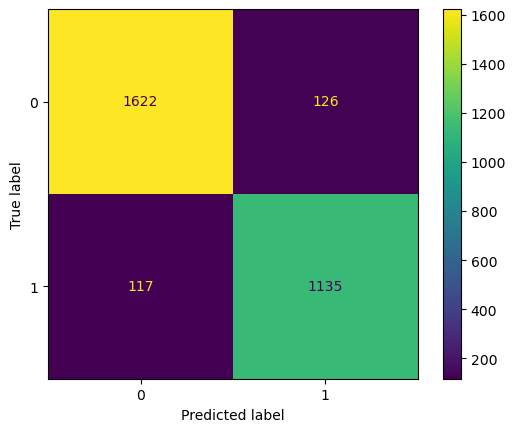

In [55]:
dt_cm_disp = ConfusionMatrixDisplay(confusion_matrix = dt_confusion_matrix)
dt_cm_disp.plot()

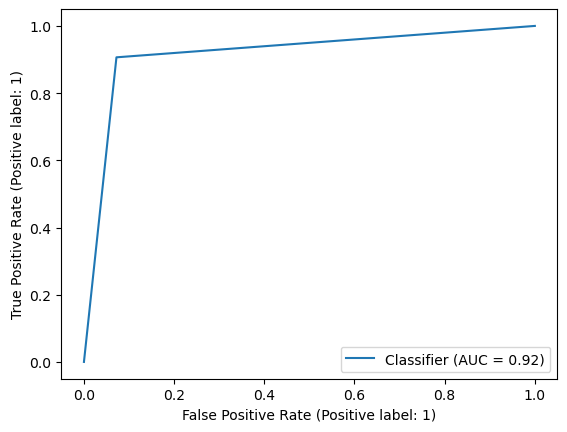

In [56]:
RocCurveDisplay.from_predictions(y_test, dt_preds)

In [100]:
dt_roc_auc_score = roc_auc_score(y_test, dt_preds)
dt_roc_auc_score

0.9172335704520366

In [57]:
# Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [58]:
rf_preds = rf.predict(x_test)

In [59]:
accuracy_score(y_test, rf_preds)

0.9206666666666666

In [60]:
print(classification_report(y_test, rf_preds))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93      1748
           1       0.93      0.88      0.90      1252

    accuracy                           0.92      3000
   macro avg       0.92      0.91      0.92      3000
weighted avg       0.92      0.92      0.92      3000



In [61]:
rf_precision = precision_score(y_test, rf_preds)
rf_precision

0.9303904923599321

In [62]:
rf_recall = recall_score(y_test, rf_preds)
rf_recall

0.8753993610223643

In [63]:
rf_f1 = f1_score(y_test, rf_preds)
rf_f1

0.9020576131687245

In [64]:
rf_confusion_matrix = confusion_matrix(y_test, rf_preds)
rf_confusion_matrix

array([[1666,   82],
       [ 156, 1096]], dtype=int64)

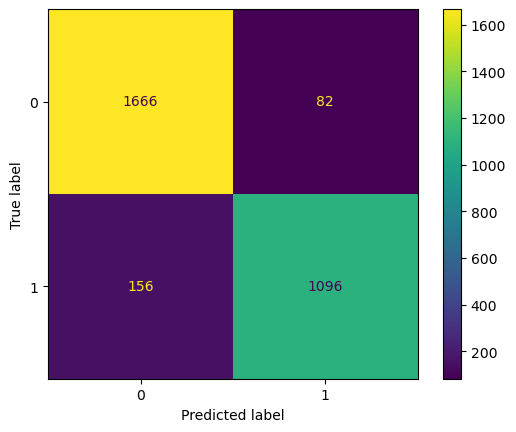

In [65]:
rf_cm_disp = ConfusionMatrixDisplay(confusion_matrix = rf_confusion_matrix)
rf_cm_disp.plot()

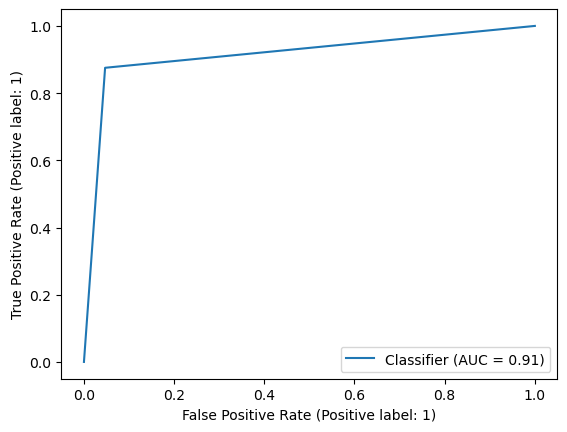

In [66]:
RocCurveDisplay.from_predictions(y_test, rf_preds)

In [101]:
rf_roc_auc_score = roc_auc_score(y_test, rf_preds)
rf_roc_auc_score

0.9142443029368114

In [67]:
# Naive Bayes Model

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)

GaussianNB()

In [69]:
gnb_preds = gnb.predict(x_test)

In [70]:
accuracy_score(y_test, gnb_preds)

0.7083333333333334

In [71]:
print(classification_report(y_test, gnb_preds))

              precision    recall  f1-score   support

           0       0.82      0.63      0.72      1748
           1       0.61      0.81      0.70      1252

    accuracy                           0.71      3000
   macro avg       0.72      0.72      0.71      3000
weighted avg       0.74      0.71      0.71      3000



In [72]:
gnb_precision = precision_score(y_test, gnb_preds)
gnb_precision

0.6138972809667673

In [73]:
gnb_recall = recall_score(y_test, gnb_preds)
gnb_recall

0.8115015974440895

In [74]:
gnb_f1 = f1_score(y_test, gnb_preds)
gnb_f1

0.6990024079807361

In [75]:
gnb_confusion_matrix = confusion_matrix(y_test, gnb_preds)
gnb_confusion_matrix

array([[1109,  639],
       [ 236, 1016]], dtype=int64)

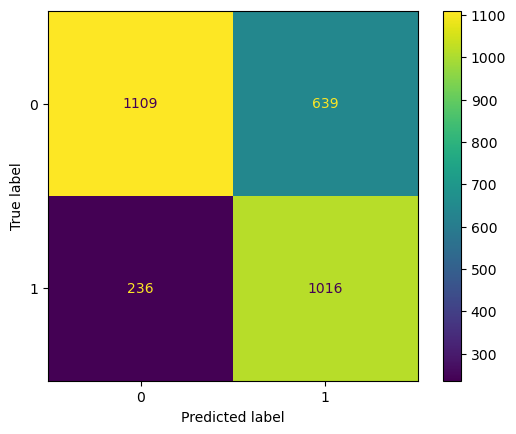

In [76]:
gnb_cm_disp = ConfusionMatrixDisplay(confusion_matrix = gnb_confusion_matrix)
gnb_cm_disp.plot()

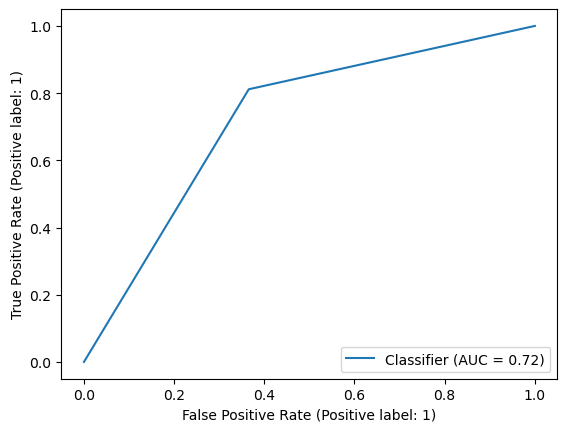

In [77]:
RocCurveDisplay.from_predictions(y_test, gnb_preds)

In [102]:
gnb_roc_auc_score = roc_auc_score(y_test, gnb_preds)
gnb_roc_auc_score

0.7229704783559121

In [78]:
# K - NN

from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
mm.fit(x_train)
tr_xtrain = mm.transform(x_train)
tr_xtest = mm.transform(x_test)


from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(tr_xtrain, y_train)

KNeighborsClassifier()

In [79]:
knn_preds = knn.predict(tr_xtest)

In [80]:
accuracy_score(y_test, knn_preds)

0.8086666666666666

In [81]:
print(classification_report(y_test, knn_preds))

              precision    recall  f1-score   support

           0       0.76      0.98      0.86      1748
           1       0.95      0.57      0.71      1252

    accuracy                           0.81      3000
   macro avg       0.85      0.78      0.79      3000
weighted avg       0.84      0.81      0.80      3000



In [82]:
knn_precision = precision_score(y_test, knn_preds)
knn_precision

0.9472295514511874

In [83]:
knn_recall = recall_score(y_test, knn_preds)
knn_recall

0.5734824281150159

In [84]:
knn_f1 = f1_score(y_test, knn_preds)
knn_f1

0.7144278606965174

In [85]:
knn_confusion_matrix = confusion_matrix(y_test, knn_preds)
knn_confusion_matrix

array([[1708,   40],
       [ 534,  718]], dtype=int64)

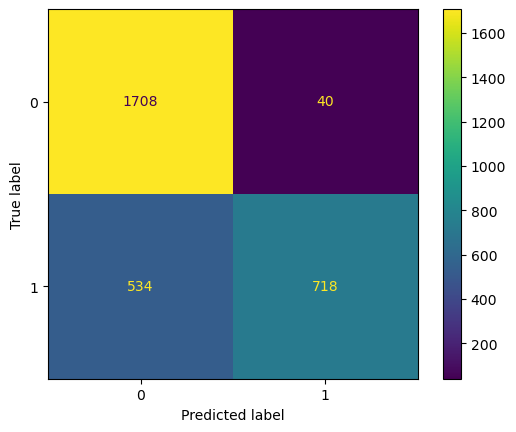

In [86]:
knn_cm_disp = ConfusionMatrixDisplay(confusion_matrix = knn_confusion_matrix)
knn_cm_disp.plot()

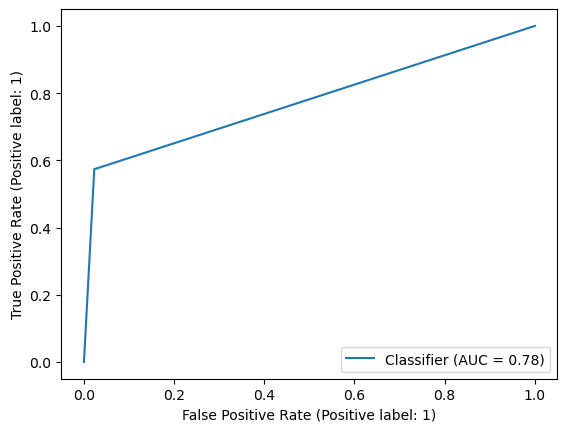

In [87]:
RocCurveDisplay.from_predictions(y_test, knn_preds)

In [103]:
knn_roc_auc_score = roc_auc_score(y_test, knn_preds)
knn_roc_auc_score

0.775299566460254

In [90]:
# SVM

from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
mm.fit(x_train)
tr_xtrain = mm.transform(x_train)
tr_xtest = mm.transform(x_test)

from sklearn.svm import SVC
sv = SVC()
sv.fit(tr_xtrain, y_train)

SVC()

In [91]:
sv_preds = sv.predict(tr_xtest)

In [92]:
accuracy_score(y_test, sv_preds)

0.912

In [93]:
print(classification_report(y_test, sv_preds))

              precision    recall  f1-score   support

           0       0.89      0.96      0.93      1748
           1       0.94      0.84      0.89      1252

    accuracy                           0.91      3000
   macro avg       0.92      0.90      0.91      3000
weighted avg       0.91      0.91      0.91      3000



In [94]:
sv_precision = precision_score(y_test, sv_preds)
sv_precision

0.9410714285714286

In [95]:
sv_recall = recall_score(y_test, sv_preds)
sv_recall

0.84185303514377

In [96]:
sv_f1 = f1_score(y_test, sv_preds)
sv_f1

0.8887015177065766

In [97]:
sv_confusion_matrix = confusion_matrix(y_test, sv_preds)
sv_confusion_matrix

array([[1682,   66],
       [ 198, 1054]], dtype=int64)

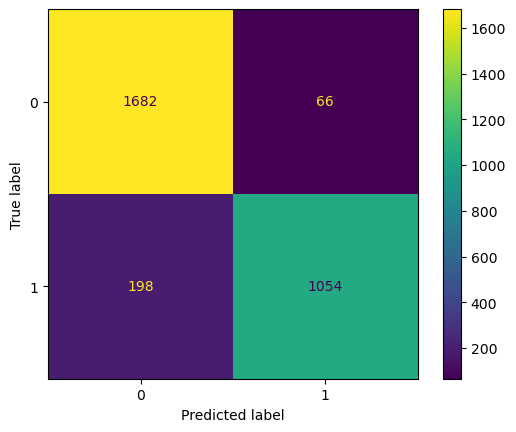

In [98]:
sv_cm_disp = ConfusionMatrixDisplay(confusion_matrix = sv_confusion_matrix)
sv_cm_disp.plot()

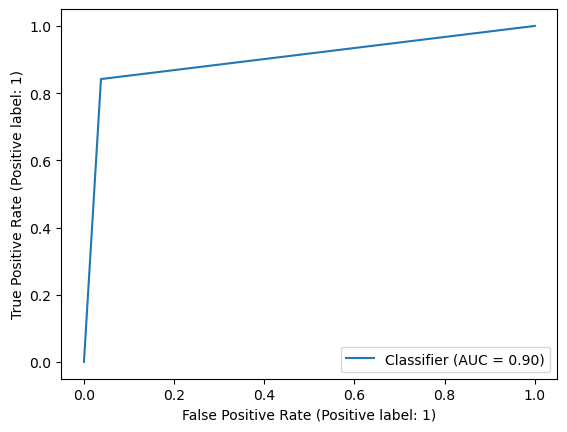

In [99]:
RocCurveDisplay.from_predictions(y_test, sv_preds)

In [104]:
sv_roc_auc_score = roc_auc_score(y_test, sv_preds)
sv_roc_auc_score

0.9020477990364159

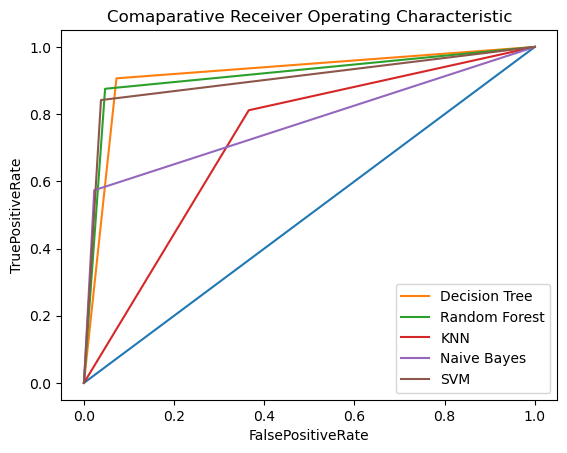

In [107]:
# Comparative ROC Curve for 5 models

from sklearn.metrics import roc_curve
 
fpr1 , tpr1, thresholds1 = roc_curve(y_test, dt_preds)

fpr2 , tpr2, thresholds2 = roc_curve(y_test, rf_preds)

fpr3 , tpr3, thresholds3 = roc_curve(y_test, gnb_preds)

fpr4 , tpr4, thresholds4 = roc_curve(y_test, knn_preds)

fpr5 , tpr5, thresholds5 = roc_curve(y_test, sv_preds)



plt.plot([0,1],[0,1])
plt.plot(fpr1, tpr1, label= "Decision Tree")
plt.plot(fpr2, tpr2, label= "Random Forest")
plt.plot(fpr3, tpr3, label= "KNN")
plt.plot(fpr4, tpr4, label= "Naive Bayes")
plt.plot(fpr5, tpr5, label= "SVM")
plt.legend()
plt.xlabel("FalsePositiveRate")
plt.ylabel("TruePositiveRate")
plt.title('Comaparative Receiver Operating Characteristic')
plt.show()

In [108]:
#DecisionTree: Pre-Pruning
from sklearn.tree import DecisionTreeClassifier
model =  DecisionTreeClassifier(random_state=1)

params = {'criterion':['gini','entropy'],
          'splitter':['best','random'],
          'max_depth':range(5,10),
          'min_samples_split':[10,20],
          'max_features':[None, 'sqrt'],
          }


from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
skf = StratifiedKFold(n_splits = 5)

rcv = RandomizedSearchCV(model, param_distributions = params, cv = skf, scoring = 'accuracy')
rcv.fit(x_train, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=DecisionTreeClassifier(random_state=1),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': range(5, 10),
                                        'max_features': [None, 'sqrt'],
                                        'min_samples_split': [10, 20],
                                        'splitter': ['best', 'random']},
                   scoring='accuracy')

In [109]:
rcv.best_score_

0.8924285714285715

In [110]:
rcv.best_params_

{'splitter': 'best',
 'min_samples_split': 10,
 'max_features': None,
 'max_depth': 9,
 'criterion': 'gini'}

In [146]:
#KNN - Tuning

from sklearn.pipeline import Pipeline

mysteps = [('mm', MinMaxScaler()), ('model', KNeighborsClassifier())]

mypipe = Pipeline(steps = mysteps )

params = {'model__n_neighbors':[5,7,11,19],
         'model__weights':['uniform','distance']}

skf = StratifiedKFold(n_splits = 5)

from sklearn.model_selection import GridSearchCV
model = KNeighborsClassifier()

gcv = GridSearchCV(mypipe, param_grid = params, cv = skf,scoring = 'accuracy')
gcv.fit(x_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('mm', MinMaxScaler()),
                                       ('model', KNeighborsClassifier())]),
             param_grid={'model__n_neighbors': [5, 7, 11, 19],
                         'model__weights': ['uniform', 'distance']},
             scoring='accuracy')

In [147]:
gcv.best_score_

0.805

In [148]:
gcv.best_params_

{'model__n_neighbors': 5, 'model__weights': 'distance'}

In [152]:
dt2 = DecisionTreeClassifier(splitter= 'best', min_samples_split= 10,max_features= None,max_depth= 9,criterion= 'gini')
dt2.fit(x_train, y_train)

dt2_preds = dt2.predict(tr_xtest)

#----------------------------------------------------

mm = MinMaxScaler()
mm.fit(x_train)
tr_xtrain = mm.transform(x_train)
tr_xtest = mm.transform(x_test)


from sklearn.neighbors import KNeighborsClassifier
knn2 = KNeighborsClassifier(n_neighbors= 5, weights='distance')
knn2.fit(tr_xtrain, y_train)

knn2_preds = knn2.predict(tr_xtest)

In [153]:
precision_score(y_test, dt2_preds)

0.9495238095238095

In [154]:
precision_score(y_test, knn2_preds)

0.9478487614080835

In [161]:
print("Decision Tree:\n", classification_report(y_test, knn2_preds))
print("\n-------------------------------------------------------------------------------------\n")
print("KNN:\n", classification_report(y_test, knn2_preds))

Decision Tree:
               precision    recall  f1-score   support

           0       0.76      0.98      0.86      1748
           1       0.95      0.58      0.72      1252

    accuracy                           0.81      3000
   macro avg       0.86      0.78      0.79      3000
weighted avg       0.84      0.81      0.80      3000


-------------------------------------------------------------------------------------

KNN:
               precision    recall  f1-score   support

           0       0.76      0.98      0.86      1748
           1       0.95      0.58      0.72      1252

    accuracy                           0.81      3000
   macro avg       0.86      0.78      0.79      3000
weighted avg       0.84      0.81      0.80      3000

